In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import ensemble
import matplotlib
#plt.style.use(['science','ieee','no-latex'])
plt.rcParams['font.sans-serif']=['SimHei']    #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False   #用来|正常显示负号
matplotlib.rcParams['font.family'] = 'SimHei'  
matplotlib.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
from sklearn.ensemble import GradientBoostingRegressor

In [11]:
train_data = pd.ExcelFile('训练集.xlsx')
train_pro = train_data.parse('分省')
validation_data = pd.ExcelFile('验证集.xlsx')
validation = validation_data.parse('Sheet1')

train_pro = train_pro.append(validation)

In [12]:
from scipy.optimize import leastsq

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def logistic_prediction(df, var, r1):
    """
    logistic增长预测
    
    Args:
        df (DataFrame)：预测集
        r1 (float)：增长速率
        province (str)：省份名称
    Returns：
        future_predict (ndarray)：预测结果
        
    """
    def logistic_increase_function(t,K,P0,r):
        t0=1
        r=r1
        # t:time   t0:initial time    P0:initial_value    K:capacity  r:increase_rate
        exp_value=np.exp(r*(t-t0))
        return (K*exp_value*P0)/(K+(exp_value-1)*P0)

    P = df[var]
    
    t = np.arange(1, 15, 1)
    
    popt, pcov = curve_fit(logistic_increase_function, t, P)
    P_predict = logistic_increase_function(t,popt[0], popt[1], popt[2])
    future=np.arange(1, 100, 1)
    future_predict=logistic_increase_function(future, popt[0], popt[1], popt[2])
    return future_predict

def draw_logistic_prediction(df, var, r_ssp1, r_ssp2, r_ssp3, r_ssp4, r_ssp5):
    plt.figure()
    plt.plot(np.arange(2006,2020,1), df[var])
    plt.plot(np.arange(2020,2101,1), logistic_prediction(df, var, r_ssp1)[18:], label='SSP1', color='green')
    plt.plot(np.arange(2020,2101,1), logistic_prediction(df, var, r_ssp2)[18:], label='SSP2', color='darkorange')
    plt.plot(np.arange(2020,2101,1), logistic_prediction(df, var, r_ssp3)[18:], label='SSP3', color='purple')
    plt.plot(np.arange(2020,2101,1), logistic_prediction(df, var, r_ssp4)[18:], label='SSP4', color='deepskyblue')
    plt.plot(np.arange(2020,2101,1), logistic_prediction(df, var, r_ssp5)[18:], label='SSP5', color='red')
    plt.legend()
    


In [53]:
def save_results(df, province, var, r_ssp1, r_ssp2, r_ssp3, r_ssp4, r_ssp5):
    dic = {}
    dic['SSP1'] = logistic_prediction(df, var, r_ssp1)[0:]
    dic['SSP2'] = logistic_prediction(df, var, r_ssp2)[0:]
    dic['SSP3'] = logistic_prediction(df, var, r_ssp3)[0:]
    dic['SSP4'] = logistic_prediction(df, var, r_ssp4)[0:]
    dic['SSP5'] = logistic_prediction(df, var, r_ssp5)[0:]
    dic['PROVINCE'] = [province] * len(dic['SSP5'])
    dic['YEAR'] = np.arange(2002,2101,1)
    DF = pd.DataFrame(dic).melt(id_vars=['YEAR','PROVINCE']).rename(columns={'variable':'SSP'})
    return DF

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

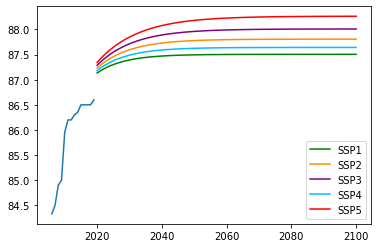

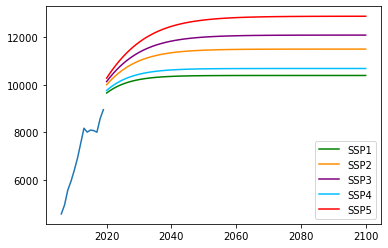

In [54]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='北京市'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='北京市'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Beijing_UR = save_results(train_pro[train_pro['PROVINCE']=='北京市'], '北京市', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Beijing_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='北京市'], '北京市', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

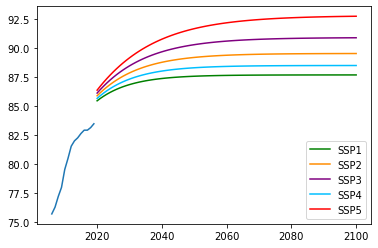

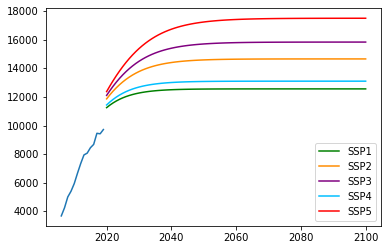

In [55]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='天津市'], 'UR',0.10, 0.08, 0.07, 0.09, 0.06)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='天津市'], 'FCE_P',0.16, 0.13, 0.12, 0.15, 0.11)

Tianjin_UR = save_results(train_pro[train_pro['PROVINCE']=='天津市'], '天津市', 'UR', 
                          0.10, 0.08, 0.07, 0.09, 0.06)
Tianjin_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='天津市'], '天津市', 'FCE_P', 
                             0.16, 0.13, 0.12, 0.15, 0.11)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

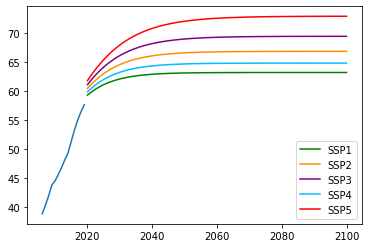

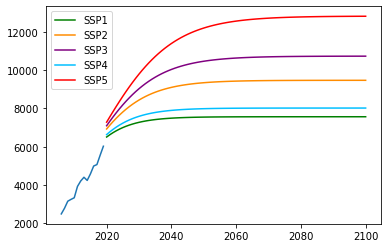

In [56]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='河北省'], 'UR',0.13, 0.11, 0.10, 0.12, 0.09)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='河北省'], 'FCE_P',0.14, 0.11, 0.10, 0.13, 0.09)

Hebei_UR = save_results(train_pro[train_pro['PROVINCE']=='河北省'], '河北省', 'UR', 
                          0.13, 0.11, 0.10, 0.12, 0.09)
Hebei_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='河北省'], '河北省', 'FCE_P', 
                             0.14, 0.11, 0.10, 0.13, 0.09)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

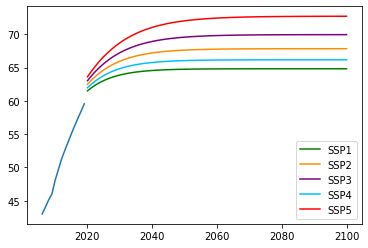

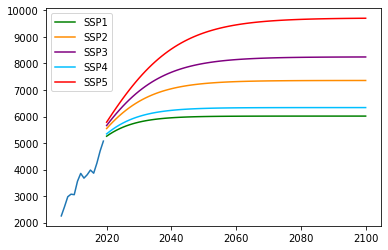

In [57]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='山西省'], 'UR',0.13, 0.11, 0.10, 0.12, 0.09)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='山西省'], 'FCE_P',0.13, 0.10, 0.09, 0.12, 0.08)

Shanxi_UR = save_results(train_pro[train_pro['PROVINCE']=='山西省'], '山西省', 'UR', 
                          0.13, 0.11, 0.10, 0.12, 0.09)
Shanxi_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='山西省'], '山西省', 'FCE_P', 
                             0.13, 0.10, 0.09, 0.12, 0.08)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

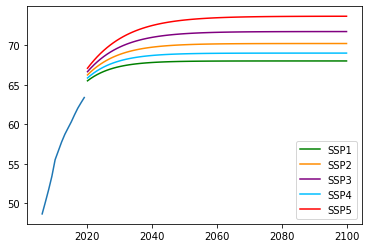

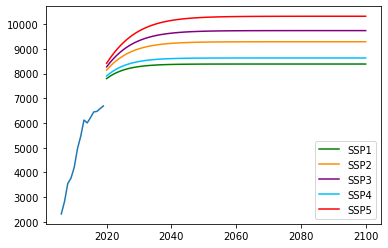

In [58]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='内蒙古自治区'], 'UR',0.13, 0.11, 0.10, 0.12, 0.09)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='内蒙古自治区'], 'FCE_P',0.18, 0.15, 0.14, 0.17, 0.13)

Neimenggu_UR = save_results(train_pro[train_pro['PROVINCE']=='内蒙古自治区'], '内蒙古自治区', 'UR', 
                          0.13, 0.11, 0.10, 0.12, 0.09)
Neimenggu_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='内蒙古自治区'], '内蒙古自治区', 'FCE_P', 
                             0.18, 0.15, 0.14, 0.17, 0.13)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

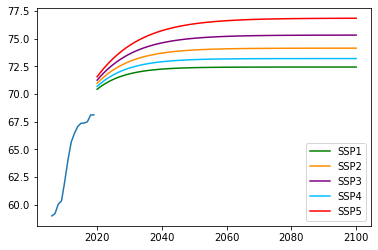

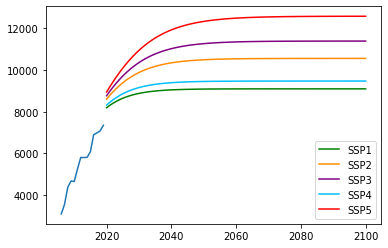

In [59]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='辽宁省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='辽宁省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Liaoning_UR = save_results(train_pro[train_pro['PROVINCE']=='辽宁省'], '辽宁省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Liaoning_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='辽宁省'], '辽宁省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

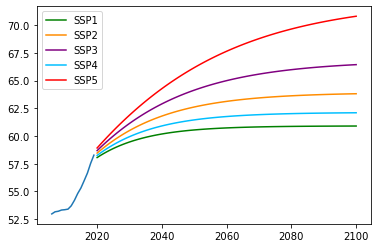

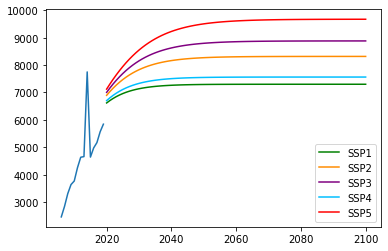

In [60]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='吉林省'], 'UR',0.07, 0.05, 0.04, 0.06, 0.03)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='吉林省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Jilin_UR = save_results(train_pro[train_pro['PROVINCE']=='吉林省'], '吉林省', 'UR', 
                          0.07, 0.05, 0.04, 0.06, 0.03)
Jilin_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='吉林省'], '吉林省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

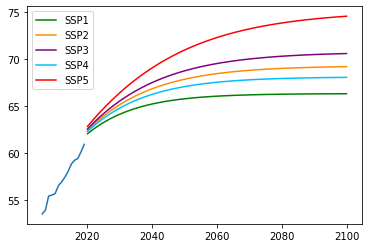

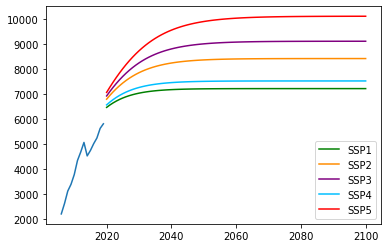

In [61]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='黑龙江省'], 'UR',0.07, 0.055, 0.05, 0.06, 0.04)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='黑龙江省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Heilongjiang_UR = save_results(train_pro[train_pro['PROVINCE']=='黑龙江省'], '黑龙江省', 'UR', 
                          0.07, 0.055, 0.05, 0.06, 0.04)
Heilongjiang_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='黑龙江省'], '黑龙江省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

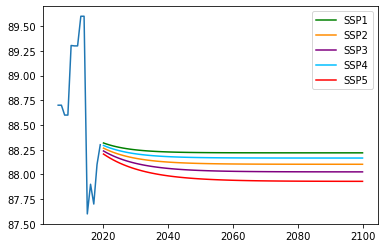

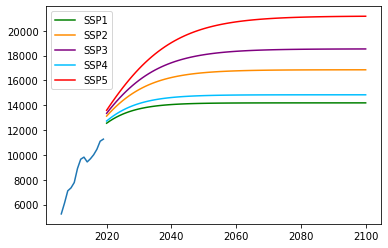

In [62]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='上海市'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='上海市'], 'FCE_P',0.13, 0.10, 0.09, 0.12, 0.08)

Shanghai_UR = save_results(train_pro[train_pro['PROVINCE']=='上海市'], '上海市', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Shanghai_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='上海市'], '上海市', 'FCE_P', 
                             0.13, 0.10, 0.09, 0.12, 0.08)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

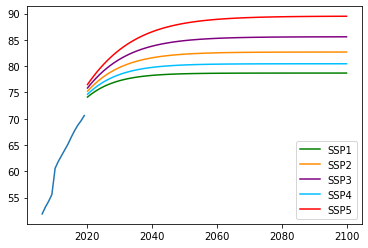

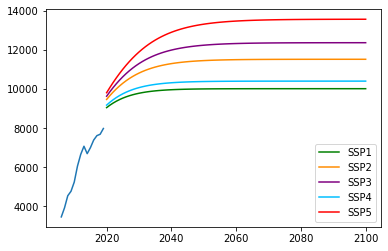

In [63]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='江苏省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='江苏省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Jiangsu_UR = save_results(train_pro[train_pro['PROVINCE']=='江苏省'], '江苏省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Jiangsu_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='江苏省'], '江苏省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

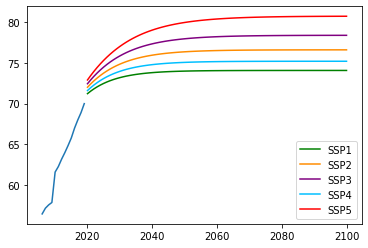

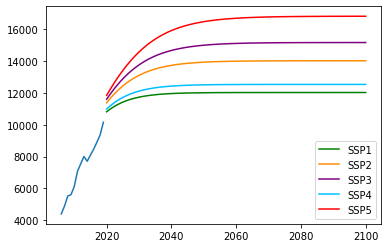

In [64]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='浙江省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='浙江省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Zhejiang_UR = save_results(train_pro[train_pro['PROVINCE']=='浙江省'], '浙江省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Zhejiang_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='浙江省'], '浙江省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

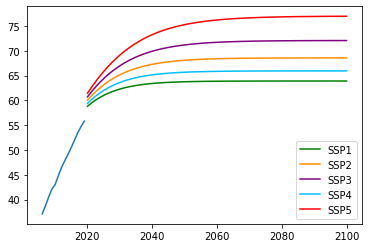

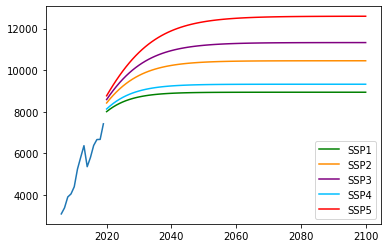

In [65]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='安徽省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='安徽省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Anhui_UR = save_results(train_pro[train_pro['PROVINCE']=='安徽省'], '安徽省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Anhui_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='安徽省'], '安徽省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

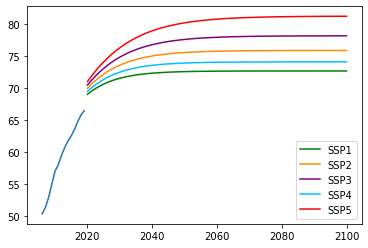

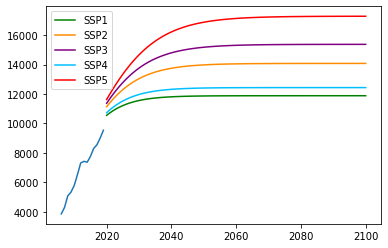

In [66]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='福建省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='福建省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Fujian_UR = save_results(train_pro[train_pro['PROVINCE']=='福建省'], '福建省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Fujian_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='福建省'], '福建省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

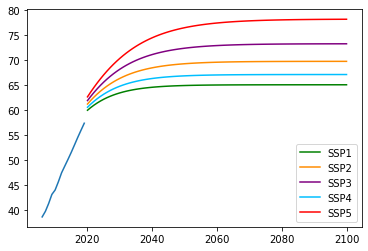

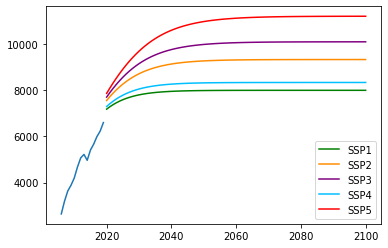

In [67]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='江西省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='江西省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Jiangxi_UR = save_results(train_pro[train_pro['PROVINCE']=='江西省'], '江西省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Jiangxi_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='江西省'], '江西省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

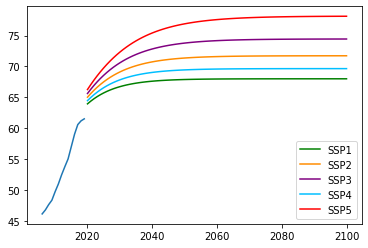

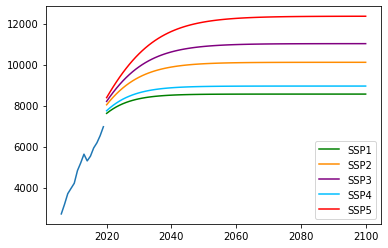

In [68]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='山东省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='山东省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Shandong_UR = save_results(train_pro[train_pro['PROVINCE']=='山东省'], '山东省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Shandong_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='山东省'], '山东省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

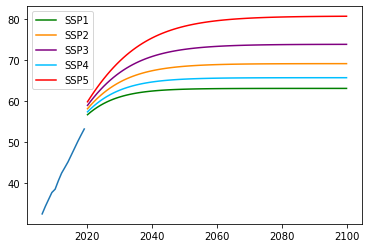

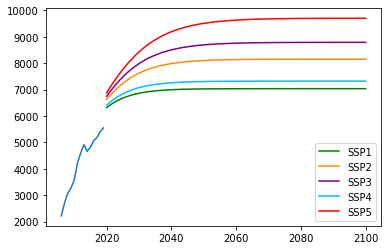

In [69]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='河南省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='河南省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Henan_UR = save_results(train_pro[train_pro['PROVINCE']=='河南省'], '河南省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Henan_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='河南省'], '河南省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

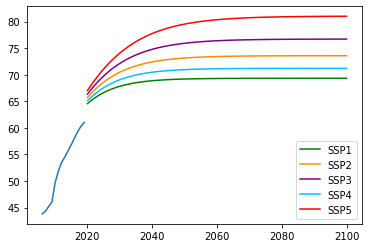

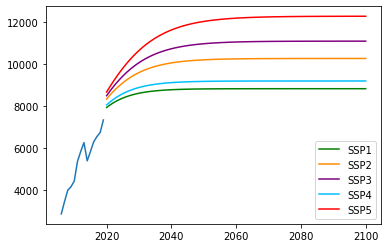

In [70]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='湖北省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='湖北省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Hubei_UR = save_results(train_pro[train_pro['PROVINCE']=='湖北省'], '湖北省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Hubei_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='湖北省'], '湖北省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

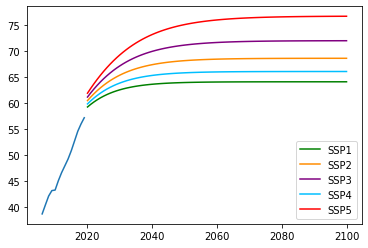

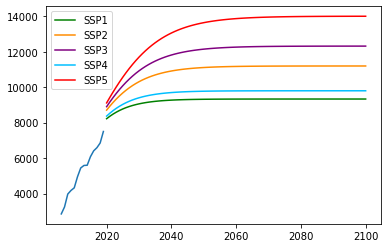

In [71]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='湖南省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='湖南省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Hunan_UR = save_results(train_pro[train_pro['PROVINCE']=='湖南省'], '湖南省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Hunan_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='湖南省'], '湖南省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

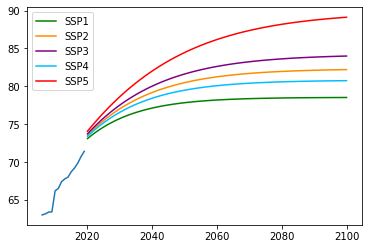

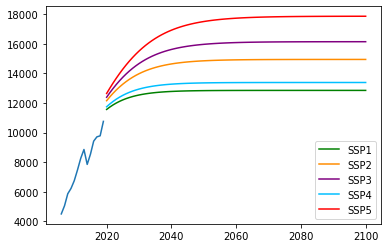

In [72]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='广东省'], 'UR',0.07, 0.055, 0.05, 0.06, 0.04)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='广东省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Guangdong_UR = save_results(train_pro[train_pro['PROVINCE']=='广东省'], '广东省', 'UR', 
                          0.07, 0.055, 0.05, 0.06, 0.04)
Guangdong_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='广东省'], '广东省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

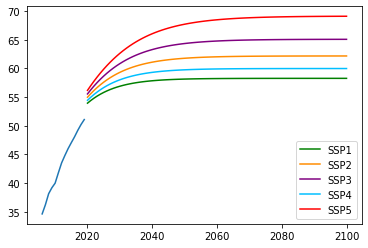

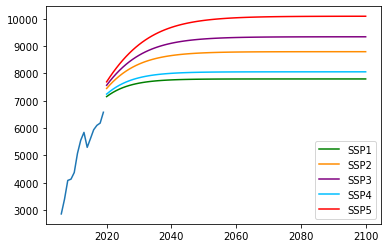

In [73]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='广西壮族自治区'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='广西壮族自治区'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Guangxi_UR = save_results(train_pro[train_pro['PROVINCE']=='广西壮族自治区'], '广西壮族自治区', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Guangxi_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='广西壮族自治区'], '广西壮族自治区', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

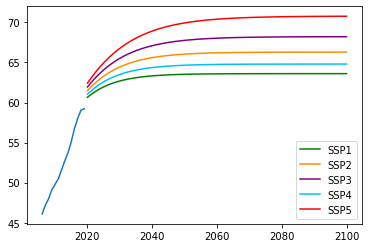

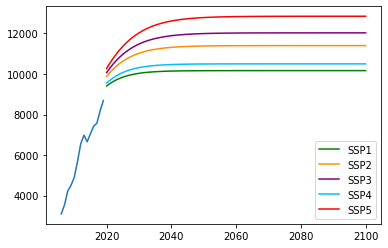

In [74]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='海南省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='海南省'], 'FCE_P',0.18, 0.15, 0.14, 0.17, 0.13)

Hainan_UR = save_results(train_pro[train_pro['PROVINCE']=='海南省'], '海南省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Hainan_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='海南省'], '海南省', 'FCE_P', 
                             0.18, 0.15, 0.14, 0.17, 0.13)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

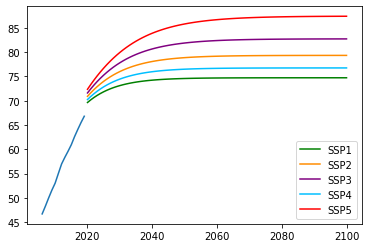

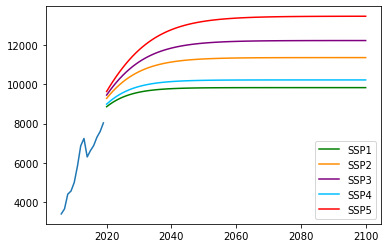

In [75]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='重庆市'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='重庆市'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Chongqing_UR = save_results(train_pro[train_pro['PROVINCE']=='重庆市'], '重庆市', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Chongqing_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='重庆市'], '重庆市', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

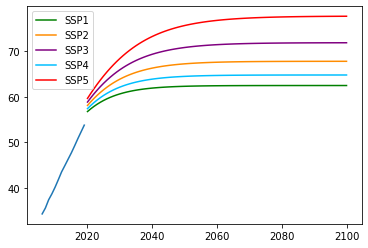

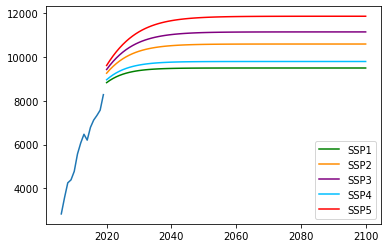

In [76]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='四川省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='四川省'], 'FCE_P',0.18, 0.15, 0.14, 0.17, 0.13)

Sichuan_UR = save_results(train_pro[train_pro['PROVINCE']=='四川省'], '四川省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Sichuan_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='四川省'], '四川省', 'FCE_P', 
                             0.18, 0.15, 0.14, 0.17, 0.13)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

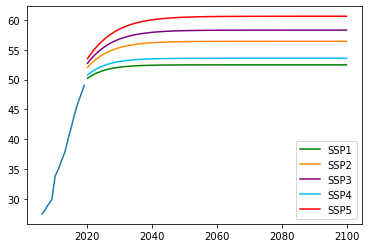

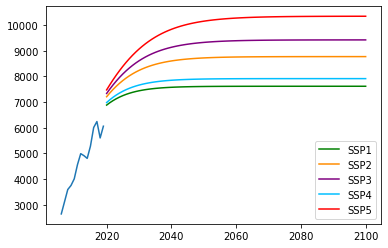

In [77]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='贵州省'], 'UR',0.18, 0.15, 0.14, 0.17, 0.13)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='贵州省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Guizhou_UR = save_results(train_pro[train_pro['PROVINCE']=='贵州省'], '贵州省', 'UR', 
                          0.18, 0.15, 0.14, 0.17, 0.13)
Guizhou_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='贵州省'], '贵州省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

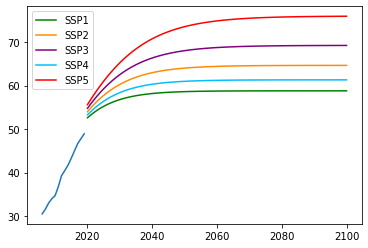

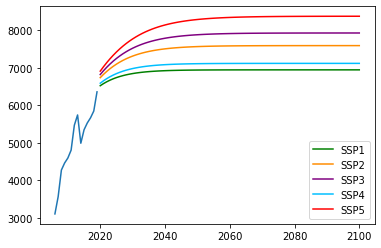

In [78]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='云南省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='云南省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Yunnan_UR = save_results(train_pro[train_pro['PROVINCE']=='云南省'], '云南省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Yunnan_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='云南省'], '云南省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

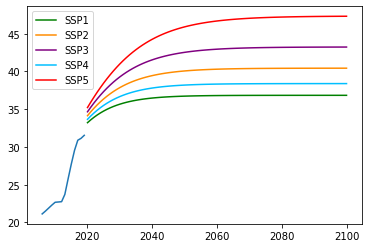

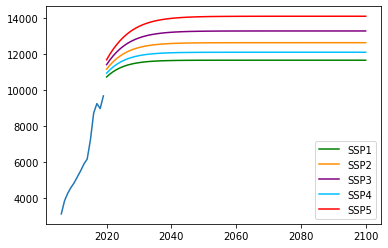

In [79]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='西藏自治区'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='西藏自治区'], 'FCE_P',0.20, 0.18, 0.17, 0.19, 0.16)

Xizang_UR = save_results(train_pro[train_pro['PROVINCE']=='西藏自治区'], '西藏自治区', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Xizang_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='西藏自治区'], '西藏自治区', 'FCE_P', 
                             0.20, 0.18, 0.17, 0.19, 0.16)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

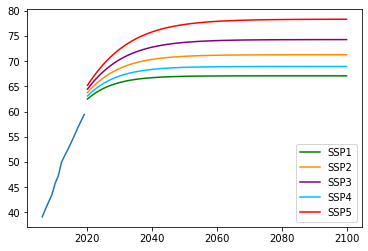

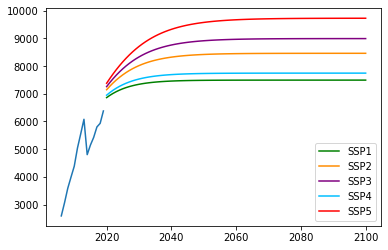

In [80]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='陕西省'], 'UR',0.13, 0.11, 0.10, 0.12, 0.09)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='陕西省'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Shaanxi_UR = save_results(train_pro[train_pro['PROVINCE']=='陕西省'], '陕西省', 'UR', 
                          0.13, 0.11, 0.10, 0.12, 0.09)
Shaanxi_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='陕西省'], '陕西省', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

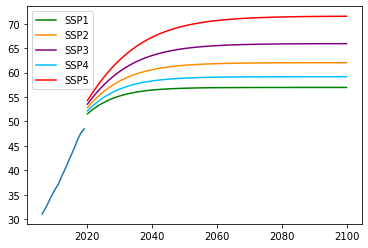

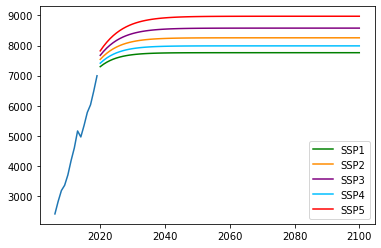

In [81]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='甘肃省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='甘肃省'], 'FCE_P',0.20, 0.18, 0.17, 0.19, 0.16)

Gansu_UR = save_results(train_pro[train_pro['PROVINCE']=='甘肃省'], '甘肃省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Gansu_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='甘肃省'], '甘肃省', 'FCE_P', 
                             0.20, 0.18, 0.17, 0.19, 0.16)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

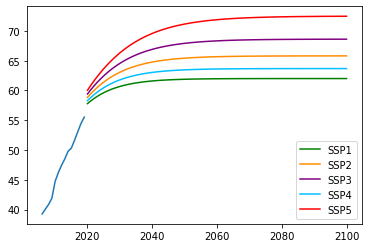

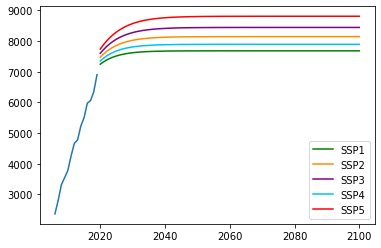

In [82]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='青海省'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='青海省'], 'FCE_P',0.20, 0.18, 0.17, 0.19, 0.16)

Qinghai_UR = save_results(train_pro[train_pro['PROVINCE']=='青海省'], '青海省', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Qinghai_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='青海省'], '青海省', 'FCE_P', 
                             0.20, 0.18, 0.17, 0.19, 0.16)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

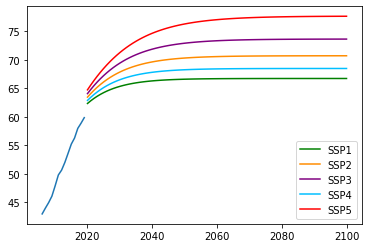

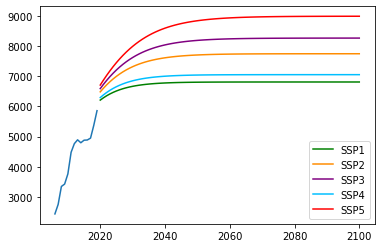

In [83]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='宁夏回族自治区'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='宁夏回族自治区'], 'FCE_P',0.15, 0.12, 0.11, 0.14, 0.10)

Ningxia_UR = save_results(train_pro[train_pro['PROVINCE']=='宁夏回族自治区'], '宁夏回族自治区', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Ningxia_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='宁夏回族自治区'], '宁夏回族自治区', 'FCE_P', 
                             0.15, 0.12, 0.11, 0.14, 0.10)

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/si

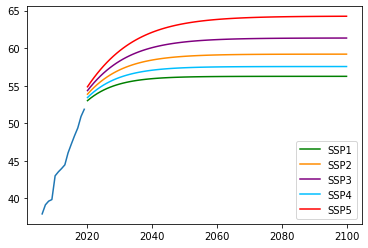

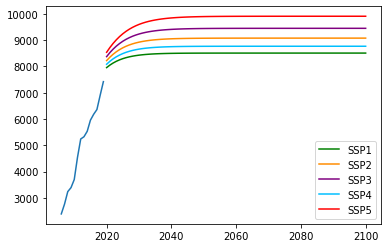

In [84]:
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='新疆维吾尔自治区'], 'UR',0.12, 0.10, 0.09, 0.11, 0.08)
draw_logistic_prediction(train_pro[train_pro['PROVINCE']=='新疆维吾尔自治区'], 'FCE_P',0.20, 0.18, 0.17, 0.19, 0.16)

Xinjiang_UR = save_results(train_pro[train_pro['PROVINCE']=='新疆维吾尔自治区'], '新疆维吾尔自治区', 'UR', 
                          0.12, 0.10, 0.09, 0.11, 0.08)
Xinjiang_FCE_P = save_results(train_pro[train_pro['PROVINCE']=='新疆维吾尔自治区'], '新疆维吾尔自治区', 'FCE_P', 
                             0.20, 0.18, 0.17, 0.19, 0.16)

In [85]:
UR_PRED = pd.concat([Beijing_UR, Tianjin_UR, Hebei_UR, Shanxi_UR, Neimenggu_UR, 
           Liaoning_UR, Jilin_UR, Heilongjiang_UR, Shanghai_UR, Jiangsu_UR,
           Zhejiang_UR, Anhui_UR, Fujian_UR, Jiangxi_UR, Shandong_UR,
           Henan_UR, Hubei_UR, Guangdong_UR, Guangxi_UR, Hainan_UR, 
           Chongqing_UR, Sichuan_UR, Guizhou_UR, Yunnan_UR, Xizang_UR,
           Shaanxi_UR, Gansu_UR, Qinghai_UR, Ningxia_UR, Xinjiang_UR])

FCE_P_PRED = pd.concat([Beijing_FCE_P, Tianjin_FCE_P, Hebei_FCE_P, Shanxi_FCE_P, Neimenggu_FCE_P, 
           Liaoning_FCE_P, Jilin_FCE_P, Heilongjiang_FCE_P, Shanghai_FCE_P, Jiangsu_FCE_P,
           Zhejiang_FCE_P, Anhui_FCE_P, Fujian_FCE_P, Jiangxi_FCE_P, Shandong_FCE_P,
           Henan_FCE_P, Hubei_FCE_P, Guangdong_FCE_P, Guangxi_FCE_P, Hainan_FCE_P, 
           Chongqing_FCE_P, Sichuan_FCE_P, Guizhou_FCE_P, Yunnan_FCE_P, Xizang_FCE_P,
           Shaanxi_FCE_P, Gansu_FCE_P, Qinghai_FCE_P, Ningxia_FCE_P, Xinjiang_FCE_P])


In [86]:
UR_PRED.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 494
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      14850 non-null  int64  
 1   PROVINCE  14850 non-null  object 
 2   SSP       14850 non-null  object 
 3   value     14850 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 580.1+ KB


In [87]:
UR_PRED['YEAR'] = UR_PRED['YEAR'].astype('int64')

In [88]:
FCE_P_PRED['YEAR'] = FCE_P_PRED['YEAR'].astype('int64')

In [89]:
FCE_P_PRED.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 494
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      14850 non-null  int64  
 1   PROVINCE  14850 non-null  object 
 2   SSP       14850 non-null  object 
 3   value     14850 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 580.1+ KB


In [90]:
predict_pro = pd.read_csv('预测.csv', encoding='utf-8')
predict_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12150 non-null  int64  
 1   PROVINCE    12150 non-null  object 
 2   SSP         12150 non-null  object 
 3   YEAR        12150 non-null  int64  
 4   GDP         12150 non-null  float64
 5   POP         12150 non-null  int64  
 6   CCF         12150 non-null  float64
 7   人均CCF       12150 non-null  int64  
 8   BA          12150 non-null  float64
 9   LDP         12150 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 949.3+ KB


In [91]:
predict_pro

,Unnamed: 0,PROVINCE,SSP,YEAR,GDP,POP,CCF,人均CCF,BA,LDP
0,0,安徽省,SSP1,2020,25098.66508,59553012,1.304211e+09,60,2230.975467,36771.85322
1,1,安徽省,SSP1,2021,26341.53474,59541502,1.303959e+09,60,2283.182068,39286.51899
2,2,安徽省,SSP1,2022,27563.63558,59499476,1.303039e+09,60,2331.820763,41743.54592
3,3,安徽省,SSP1,2023,28751.04266,59429980,1.301517e+09,60,2376.956310,44118.42901
4,4,安徽省,SSP1,2024,29889.35633,59336071,1.299460e+09,60,2418.687370,46390.03731
...,...,...,...,...,...,...,...,...,...,...
12145,12145,重庆市,SSP5,2096,36672.53796,28840746,1.052687e+09,100,3175.557942,45935.52443
12146,12146,重庆市,SSP5,2097,37055.60669,28852581,1.053119e+09,100,3175.655437,45935.55054
12147,12147,重庆市,SSP5,2098,37471.49491,28859111,1.053358e+09,100,3175.743218,45935.57269
12148,12148,重庆市,SSP5,2099,37922.15352,28859084,1.053357e+09,100,3175.822254,45935.59146


In [92]:
UR_PRED[UR_PRED['PROVINCE']=='安徽省']

,YEAR,PROVINCE,SSP,value
0,2002,安徽省,SSP1,36.489820
1,2003,安徽省,SSP1,38.349763
2,2004,安徽省,SSP1,40.165556
3,2005,安徽省,SSP1,41.926210
4,2006,安徽省,SSP1,43.622155
...,...,...,...,...
490,2096,安徽省,SSP5,76.938022
491,2097,安徽省,SSP5,76.941446
492,2098,安徽省,SSP5,76.944608
493,2099,安徽省,SSP5,76.947527


In [93]:
p1 = predict_pro.merge(UR_PRED, on=['PROVINCE', 'SSP', 'YEAR'], how='inner')

In [94]:
p1

,Unnamed: 0,PROVINCE,SSP,YEAR,GDP,POP,CCF,人均CCF,BA,LDP,value
0,0,安徽省,SSP1,2020,25098.66508,59553012,1.304211e+09,60,2230.975467,36771.85322,58.800889
1,1,安徽省,SSP1,2021,26341.53474,59541502,1.303959e+09,60,2283.182068,39286.51899,59.335686
2,2,安徽省,SSP1,2022,27563.63558,59499476,1.303039e+09,60,2331.820763,41743.54592,59.818215
3,3,安徽省,SSP1,2023,28751.04266,59429980,1.301517e+09,60,2376.956310,44118.42901,60.252794
4,4,安徽省,SSP1,2024,29889.35633,59336071,1.299460e+09,60,2418.687370,46390.03731,60.643549
...,...,...,...,...,...,...,...,...,...,...,...
12145,12145,重庆市,SSP5,2096,36672.53796,28840746,1.052687e+09,100,3175.557942,45935.52443,87.368086
12146,12146,重庆市,SSP5,2097,37055.60669,28852581,1.053119e+09,100,3175.655437,45935.55054,87.371285
12147,12147,重庆市,SSP5,2098,37471.49491,28859111,1.053358e+09,100,3175.743218,45935.57269,87.374237
12148,12148,重庆市,SSP5,2099,37922.15352,28859084,1.053357e+09,100,3175.822254,45935.59146,87.376963


In [95]:
p2 = p1.merge(FCE_P_PRED, on=['PROVINCE', 'SSP', 'YEAR'], how='inner')

In [96]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12150 entries, 0 to 12149
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12150 non-null  int64  
 1   PROVINCE    12150 non-null  object 
 2   SSP         12150 non-null  object 
 3   YEAR        12150 non-null  int64  
 4   GDP         12150 non-null  float64
 5   POP         12150 non-null  int64  
 6   CCF         12150 non-null  float64
 7   人均CCF       12150 non-null  int64  
 8   BA          12150 non-null  float64
 9   LDP         12150 non-null  float64
 10  value       12150 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 1.1+ MB


In [97]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12150 entries, 0 to 12149
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12150 non-null  int64  
 1   PROVINCE    12150 non-null  object 
 2   SSP         12150 non-null  object 
 3   YEAR        12150 non-null  int64  
 4   GDP         12150 non-null  float64
 5   POP         12150 non-null  int64  
 6   CCF         12150 non-null  float64
 7   人均CCF       12150 non-null  int64  
 8   BA          12150 non-null  float64
 9   LDP         12150 non-null  float64
 10  value_x     12150 non-null  float64
 11  value_y     12150 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 1.2+ MB


In [98]:
predict_pro.merge(UR_PRED, on=['PROVINCE', 'SSP', 'YEAR'], how='inner').merge(FCE_P_PRED, on=['PROVINCE', 'SSP', 'YEAR'], how='inner').to_csv('prediction.csv', encoding='utf_8_sig')

In [99]:
df = pd.read_csv('prediction.csv', encoding='utf-8')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12150 non-null  int64  
 1   Unnamed: 0.1  12150 non-null  int64  
 2   PROVINCE      12150 non-null  object 
 3   SSP           12150 non-null  object 
 4   YEAR          12150 non-null  int64  
 5   GDP           12150 non-null  float64
 6   POP           12150 non-null  int64  
 7   CCF           12150 non-null  float64
 8   人均CCF         12150 non-null  int64  
 9   BA            12150 non-null  float64
 10  LDP           12150 non-null  float64
 11  value_x       12150 non-null  float64
 12  value_y       12150 non-null  float64
dtypes: float64(6), int64(5), object(2)
memory usage: 1.2+ MB


In [101]:
df.drop_duplicates().to_csv('pred.csv', encoding='utf_8_sig')

In [102]:

df = df.groupby(['SSP','YEAR']).mean().reset_index()
df.to_csv('pred_qg.csv')

,SSP,YEAR,Unnamed: 0,Unnamed: 0.1,GDP,POP,CCF,人均CCF,BA,LDP,value_x,value_y
0,SSP1,2020,1174.5,1174.5,28375.609176,4.385119e+07,9.603411e+08,60.0,1969.098355,24101.996735,63.115723,8243.277705
1,SSP1,2021,1175.5,1175.5,30219.397280,4.393301e+07,9.621329e+08,60.0,2016.073578,25142.975797,63.511478,8354.561452
2,SSP1,2022,1176.5,1176.5,32088.365495,4.399663e+07,9.635263e+08,60.0,2059.975762,26122.399649,63.867926,8452.109863
3,SSP1,2023,1177.5,1177.5,33975.137393,4.404439e+07,9.645722e+08,60.0,2100.839180,27036.485667,64.188555,8537.364019
4,SSP1,2024,1178.5,1178.5,35872.887845,4.407859e+07,9.653211e+08,60.0,2138.731413,27883.126390,64.476639,8611.683637
...,...,...,...,...,...,...,...,...,...,...,...,...
400,SSP5,2096,10970.5,10970.5,82470.405815,4.966162e+07,1.812649e+09,100.0,4029.385497,53814.435952,76.609091,12262.233526
401,SSP5,2097,10971.5,10971.5,83298.701135,4.984157e+07,1.819217e+09,100.0,4031.552180,53816.311685,76.614879,12262.521602
402,SSP5,2098,10972.5,10972.5,84159.916672,5.001879e+07,1.825686e+09,100.0,4033.653557,53818.009650,76.620381,12262.784427
403,SSP5,2099,10973.5,10973.5,85061.278953,5.019221e+07,1.832016e+09,100.0,4035.694765,53819.546969,76.625611,12263.024236


In [108]:
UR_PRED.groupby(['YEAR', 'SSP']).mean().reset_index().to_csv('UR_QG.csv')

In [111]:
FCE_P_PRED.groupby(['YEAR', 'SSP']).mean().reset_index().to_csv('FCE_P_QG.csv')

In [112]:
FCE_P_PRED

,YEAR,PROVINCE,SSP,value
0,2002,北京市,SSP1,4864.937528
1,2003,北京市,SSP1,5254.204811
2,2004,北京市,SSP1,5642.822777
3,2005,北京市,SSP1,6026.472496
4,2006,北京市,SSP1,6401.053507
...,...,...,...,...
490,2096,新疆维吾尔自治区,SSP5,9910.225472
491,2097,新疆维吾尔自治区,SSP5,9910.226704
492,2098,新疆维吾尔自治区,SSP5,9910.227754
493,2099,新疆维吾尔自治区,SSP5,9910.228649
